# Heart Disease Prediction Using Machine Learning 

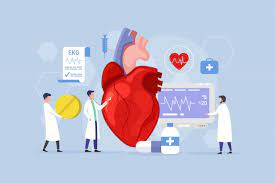

## Project Objective 
Heart Disease Prediction using Machine Learning
Heart disease prevention is critical, and data-driven prediction systems can significantly aid in early diagnosis and treatment. Machine Learning offers accurate prediction capabilities, enhancing healthcare outcomes.
In this project, I analyzed a heart disease dataset with appropriate preprocessing. Multiple classification algorithms were implemented in Python using Scikit-learn and Keras to predict the presence of heart disease.

**Algorithms Used**:
- Logistic Regression
- Naive Bayes
- Support Vector Machine (Linear)
- K-Nearest Neighbors
- Decision Tree
- Random Forest
- XGBoost
- Artificial Neural Network (1 Hidden Layer, Keras)

In [1]:
# multiple model test : Best Model Save (Best score)

# Step 1 : Import Necessary Modules

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,root_mean_squared_error
import warnings 
warnings.filterwarnings('ignore')
print('All Modules Imported Successfully')

All Modules Imported Successfully


# Step 2 : Loading Data 

In [3]:
url = '''https://github.com/ankitmisk/Heart_Disease_Prediction_ML_Model/blob/main/heart.csv?raw=true'''
df = pd.read_csv(url)
print('Done')

Done


# Step 3 : Understanding Data using EDA

In [4]:
# 3.1 Data Head 
df.head()


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [5]:
# 3.2 data tail 
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0

In [6]:
# 3.3 Data shape
df.shape

(303, 14)

In [7]:
# 3.4 Data information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# 3.5 Data columns 
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

#### 3.6 Columns desc 
- **age**:			``age``
- **sex**:			``1: male, 0: female``
- **cp**:			``chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic``
- **trestbps**:			``resting blood pressure``
- **chol**:			`` serum cholestoral in mg/dl``
- **fbs**:			``fasting blood sugar > 120 mg/dl``
- **restecg**:			``resting electrocardiographic results (values 0,1,2)``
- **thalach**:			 ``maximum heart rate achieved``
- **exang**:			``exercise induced angina``
- **oldpeak**:			``oldpeak = ST depression induced by exercise relative to rest``
- **slope**:			``the slope of the peak exercise ST segment``
- **ca**:			``number of major vessels (0-3) colored by flourosopy``
- **thal**:			``thal: 3 = normal; 6 = fixed defect; 7 = reversable defect``

In [9]:
# Domain Knowledge is required for this level of project 

##### 3.7 Checking Null Values

In [10]:
df.isna().sum()
# no null values found
# in case of null : remove , drop , fillna

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

##### 3.8 Columns Stats

In [11]:
df.describe().round(2)

age     sex      cp  trestbps    chol     fbs  restecg  thalach  \
count  303.00  303.00  303.00    303.00  303.00  303.00   303.00   303.00   
mean    54.37    0.68    0.97    131.62  246.26    0.15     0.53   149.65   
std      9.08    0.47    1.03     17.54   51.83    0.36     0.53    22.91   
min     29.00    0.00    0.00     94.00  126.00    0.00     0.00    71.00   
25%     47.50    0.00    0.00    120.00  211.00    0.00     0.00   133.50   
50%     55.00    1.00    1.00    130.00  240.00    0.00     1.00   153.00   
75%     61.00    1.00    2.00    140.00  274.50    0.00     1.00   166.00   
max     77.00    1.00    3.00    200.00  564.00    1.00     2.00   202.00   

        exang  oldpeak   slope      ca    thal  target  
count  303.00   303.00  303.00  303.00  303.00  303.00  
mean     0.33     1.04    1.40    0.73    2.31    0.54  
std      0.47     1.16    0.62    1.02    0.61    0.50  
min      0.00     0.00    0.00    0.00    0.00    0.00  
25%      0.00     0.00    1.00    0.00    2.00    0.00  
50%      0.00     0.80    1.00    0.00    2.00    1.00  
75%      1.00     1.60    2.00    1.00    3.00    1.00  
max      1.00     6.20    2.00    4.00    3.00    1.00

##### 3.9 each Column Univariate Analysis

In [12]:
for i in df:
    print(f'Column {i}',df[i].unique())
    print('--------------------------------',end ='\n\n')

Column age [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
--------------------------------

Column sex [1 0]
--------------------------------

Column cp [3 2 1 0]
--------------------------------

Column trestbps [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
--------------------------------

Column chol [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353

##### 3.10 Each Numerical Features Hist Plot Distribution 

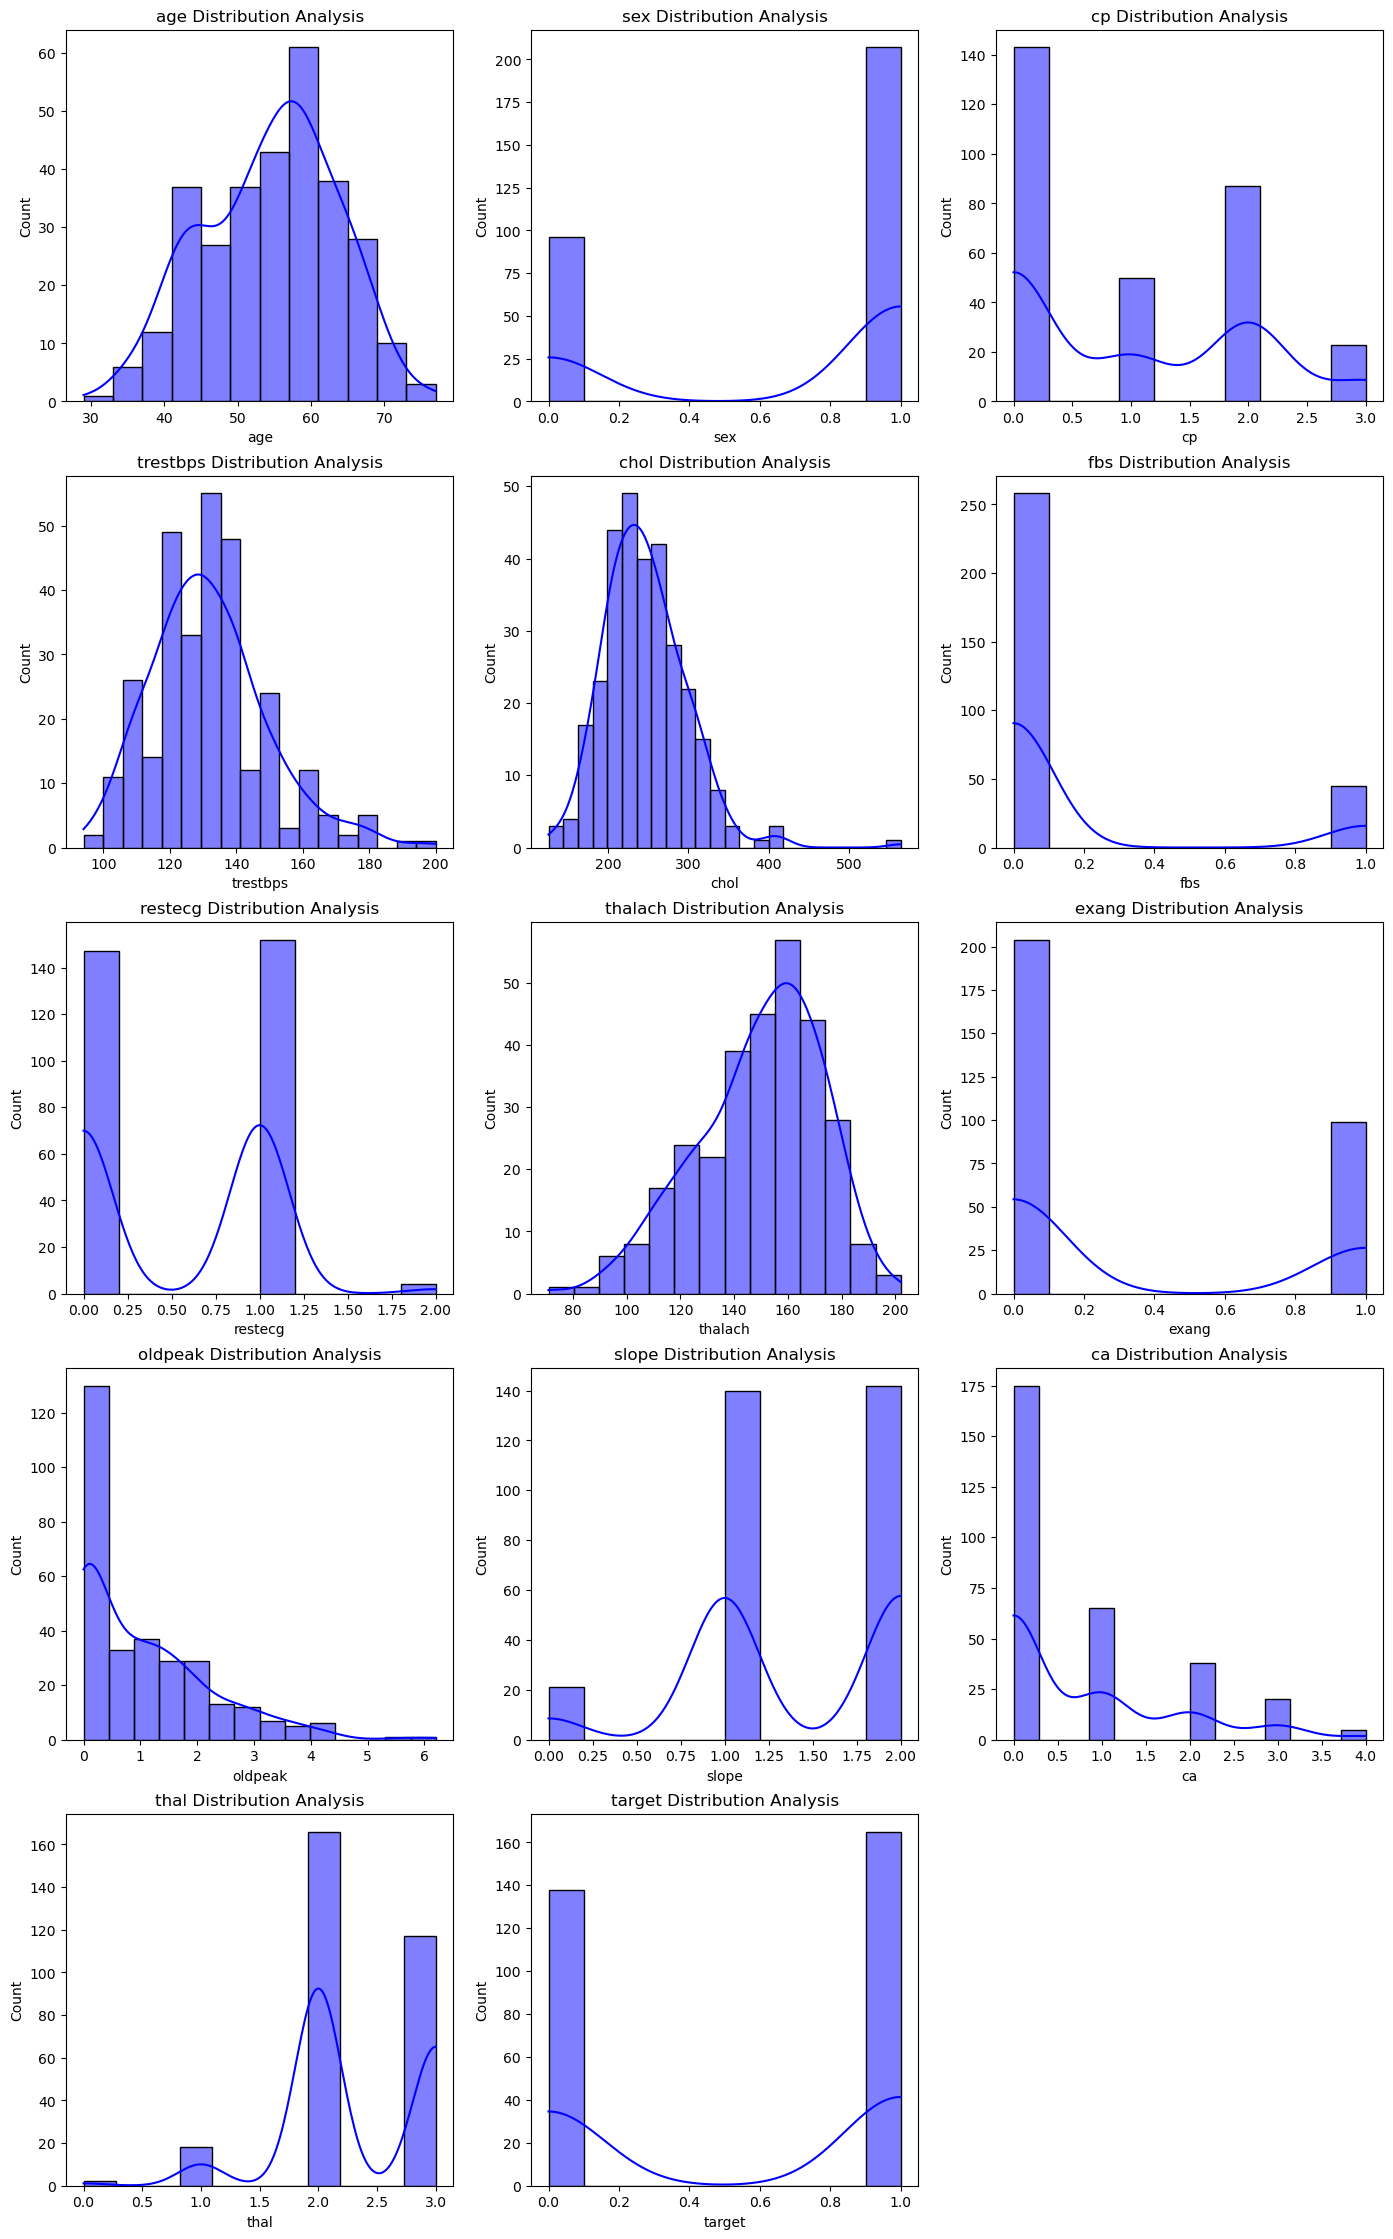

In [13]:
r = 5
c = 3
plt.figure(figsize = (17,28))
for i,j in enumerate(df):
    plt.subplot(r,c, i+1)
    plt.title(f'{j} Distribution Analysis')
    sns.histplot(df[j], kde = True, color = 'blue')
    
plt.savefig('All Numerical Feature Analysis.jpeg',dpi = 500)
plt.show()

In [14]:
# target column is not imblance , we can proceed, if imbalance found we need to balance using sampling

##### 3.11 Bivariate Analysis, To check Correlation of Features vs Target 

<Axes: >

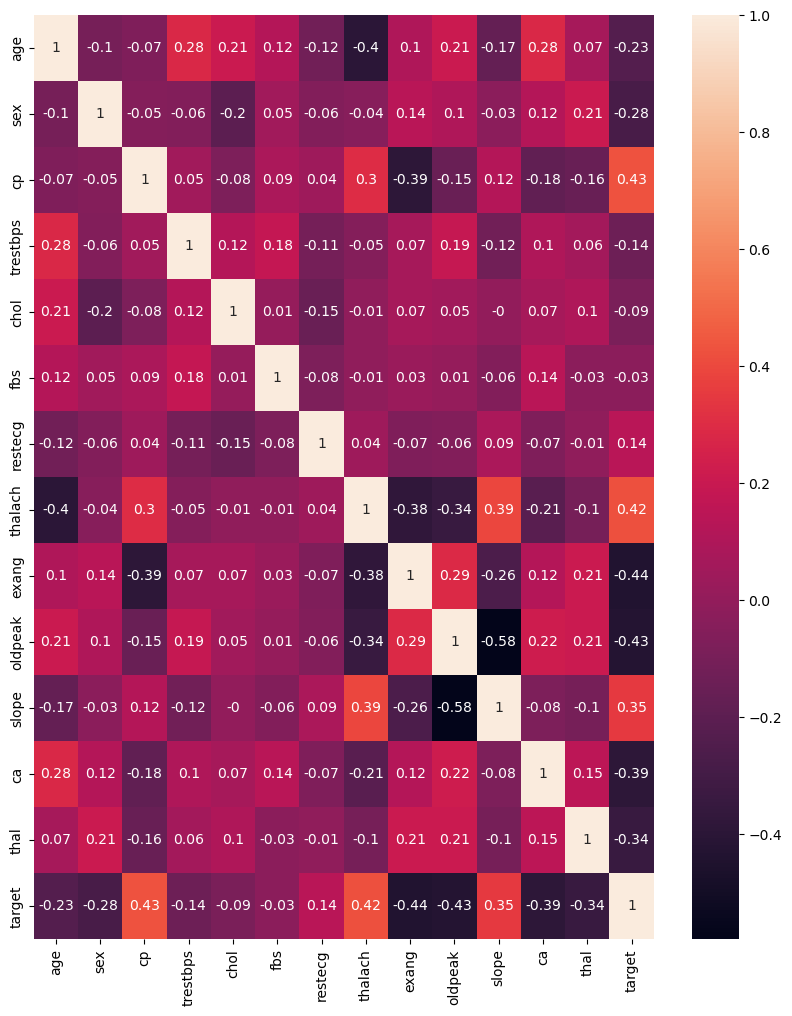

In [15]:
plt.figure(figsize = (10,12))
sns.heatmap(df.corr().round(2), annot = True)

In [16]:
df.corr()['target'].sort_values(ascending = False).reset_index()

index    target
0     target  1.000000
1         cp  0.433798
2    thalach  0.421741
3      slope  0.345877
4    restecg  0.137230
5        fbs -0.028046
6       chol -0.085239
7   trestbps -0.144931
8        age -0.225439
9        sex -0.280937
10      thal -0.344029
11        ca -0.391724
12   oldpeak -0.430696
13     exang -0.436757

In [17]:
df.columns[:-1]

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

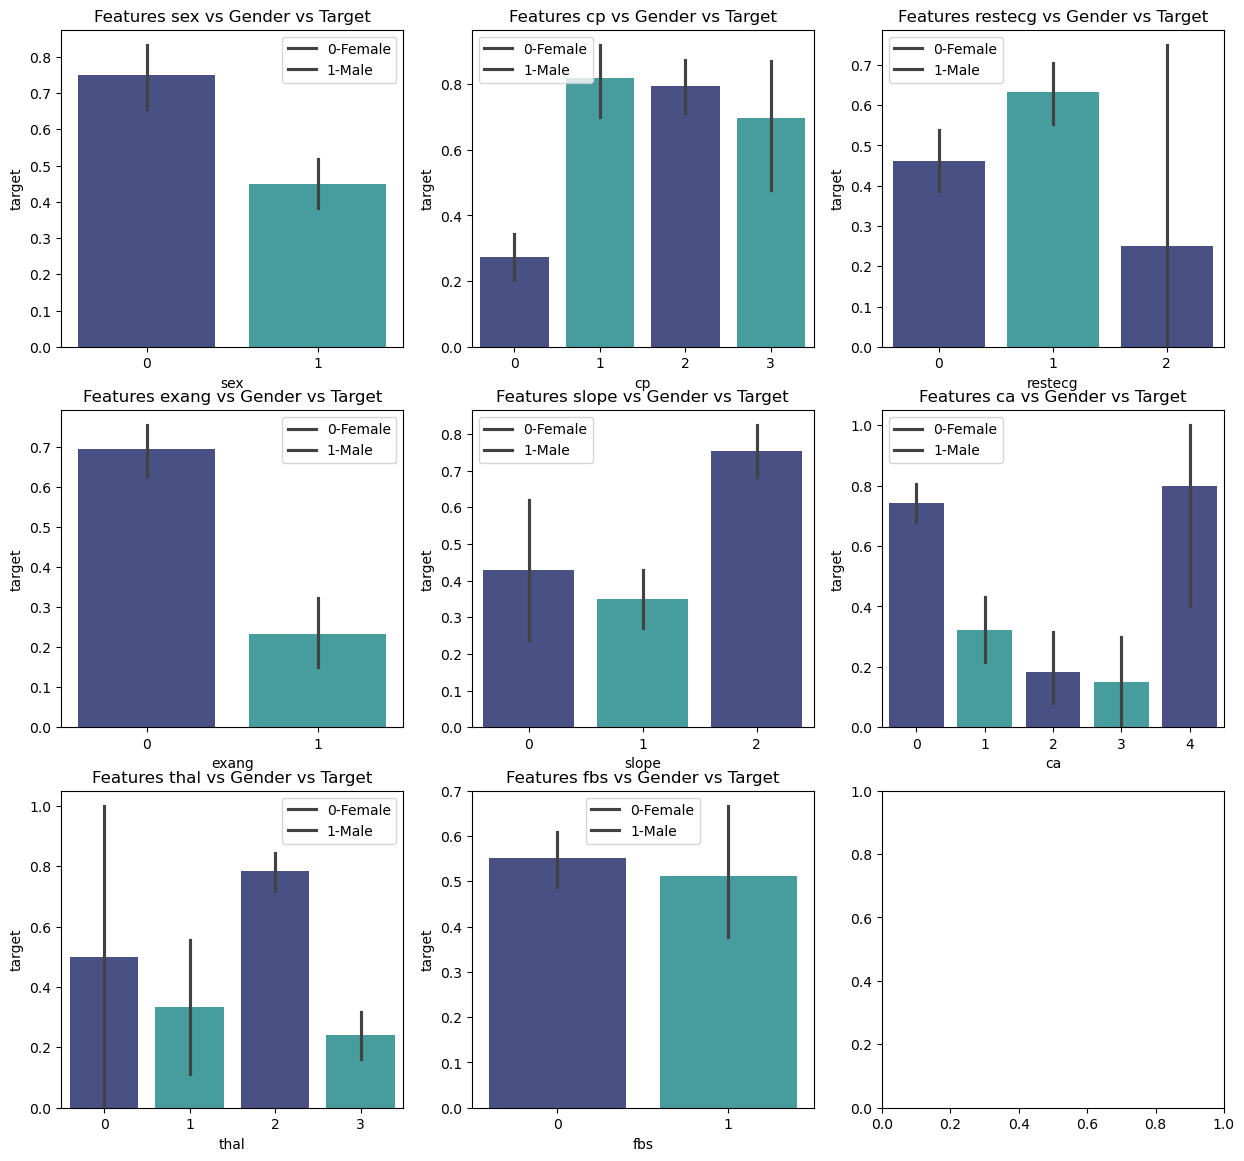

In [18]:
r = 3
c = 3
x_col = ['sex','cp','restecg','exang','slope','ca','thal','fbs']
plt.figure(figsize = (15,14))
for i in range(r*c):
    try:
        plt.subplot(r,c, i+1)
        plt.title(f'Features {x_col[i]} vs Gender vs Target')
        sns.barplot(data = df, x = x_col[i], y = 'target', palette = sns.color_palette('mako',2))
        plt.legend(['0-Female', '1-Male'])
    except:
        ...
    
   


#### 3.13 Feature vs Target 

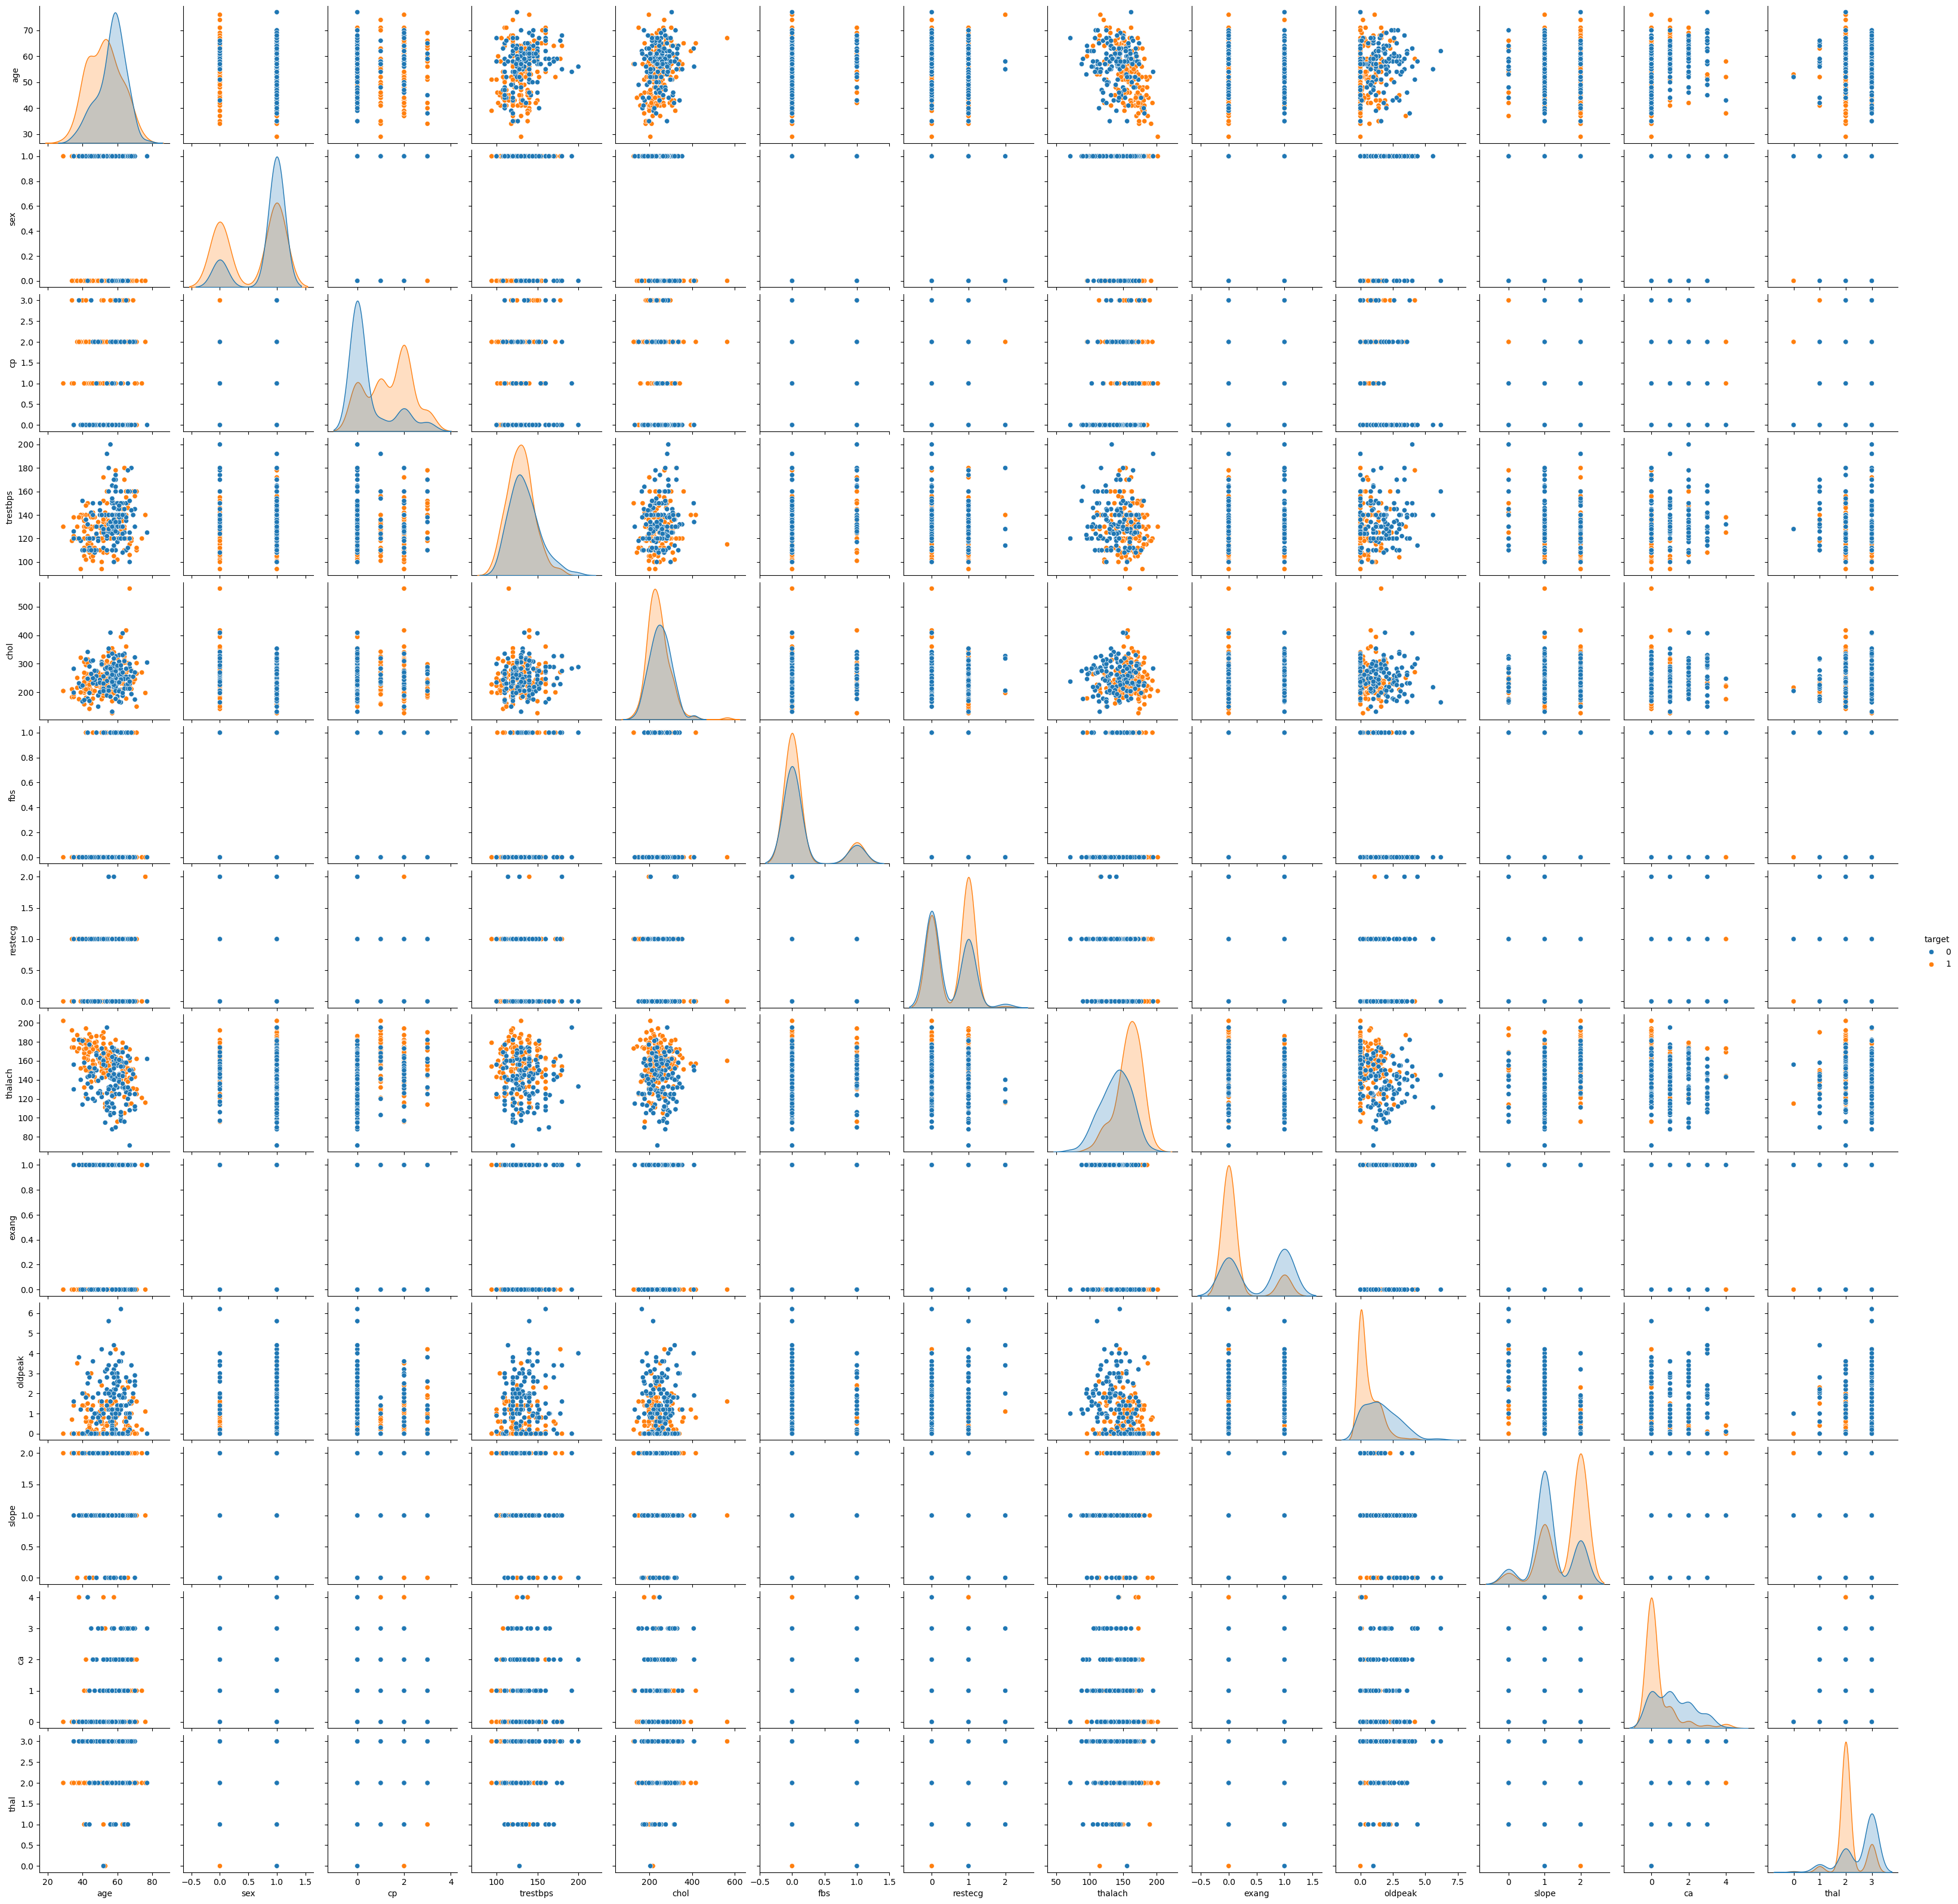

In [19]:
sns.pairplot(data = df, hue = 'target')

plt.show()

# Divide Data Into Train and Test

In [20]:
X = df.iloc[:,:-1]
y = df['target']

In [21]:
X.shape, y.shape

((303, 13), (303,))

##### 4.1 : Train Test Split 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


# Step 5 : Multi Model Creation 

In [24]:
# because target value : only : 0,1 (Binary Classification)
# this is not a regression problem, 

![1_dqeortojRQDxvA_um2d8uA.png](attachment:2b129a2c-6e7f-4190-93bb-8faf84ac99fb.png)

### Step 5.1 : Logistic Regression ML Model 

In [25]:
# it uses the concept of Sigmoid Func : linear Point converted to Sigmoid(s) curve 

In [26]:
# y_pred = mx+ c

In [27]:
# z = y_pred

# y_pred = linear Regression 
# Sigmoid Func convert Linear line to s curve 

# logistic Regression 

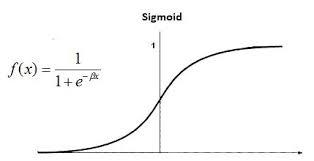

In [28]:
# 5.1.1 Import Logistic Regression 

In [29]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression() # Model Object Creation 

model_lr.fit(X_train,y_train) # Training/ model Building : it learns the partern in this step 

LogisticRegression()

In [30]:
y_pred = model_lr.predict(X_test)
# y_pred

In [31]:
# 5.1.2 Import model evaluation metrics 
# it will be called only when problem is of classification 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report 

In [32]:
# 5.1.3 Import Confusion Matrics  To Evaluate Classification 
from sklearn.metrics import confusion_matrix

In [33]:
# error comprasion: if score tie
# type 1,type 2: type 1 error danger 

In [34]:
cm = confusion_matrix(y_test, y_pred)

In [35]:
print(cm)

[[25  4]
 [ 3 29]]


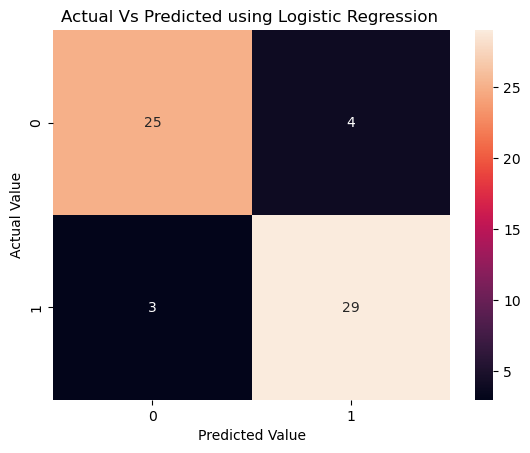

In [36]:
plt.title('Actual Vs Predicted using Logistic Regression ')
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [37]:
cm 

array([[25,  4],
       [ 3, 29]])

In [38]:
TN,FP,FN,TP = cm.ravel()

In [39]:
precision_score(y_test, y_pred)

0.8787878787878788

In [40]:
ps = TP/(TP+FP)
print(ps)

0.8787878787878788


In [41]:
accuracy_score(y_test, y_pred)

0.8852459016393442

In [42]:
acs = (TN+TP)/cm.sum()
acs

np.float64(0.8852459016393442)

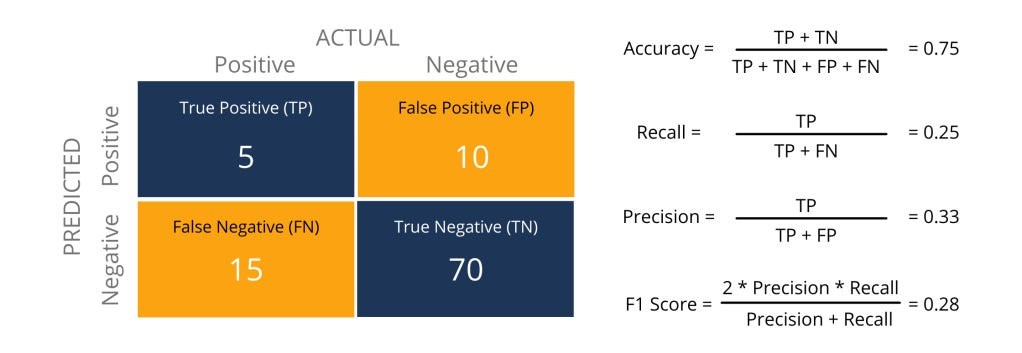

In [43]:
rs = recall_score(y_test, y_pred)
print('Recall Score is :', rs)

Recall Score is : 0.90625


In [44]:
# F1 score To evaluate both precision and Recall Score 

In [45]:
f1_sc = f1_score(y_test, y_pred)

In [46]:
print('F1 Score :', f1_sc)

F1 Score : 0.8923076923076924


In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [48]:
# 5.1.4 : Checking Model Score : 
# model score same as accuracy score
lr_score = model_lr.score(X_test,y_test)
print('Logistic Score is : ', lr_score)

Logistic Score is :  0.8852459016393442


### Step 5.2 : Naive Bayes ML Model 

In [49]:
# pre-assupmtions : it will pre-assume, No Correlation b/w features

##### 5.2.1 Import Naive Model

In [50]:
from sklearn.naive_bayes import GaussianNB
# GaussianNB only use in case of binary classification 
# MultinomialNB : only use in case of multi- class classification 

model_nv = GaussianNB()

model_nv.fit(X_train, y_train) #train part/ learning

GaussianNB()

In [51]:
y_pred = model_nv.predict(X_test)

In [52]:
nv_score = model_nv.score(X_test,y_test)
print('Naive Bayes Score:', nv_score)

Naive Bayes Score: 0.8688524590163934


In [53]:
print('Accuracy Score', accuracy_score(y_test, y_pred))
print('Precision Score', precision_score(y_test, y_pred))
print('Recall Score', recall_score(y_test, y_pred))
print('F1 Score', f1_score(y_test, y_pred))

Accuracy Score 0.8688524590163934
Precision Score 0.9
Recall Score 0.84375
F1 Score 0.8709677419354839


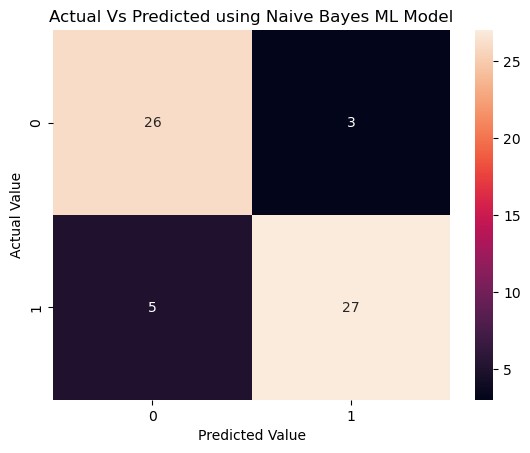

In [54]:
cm = confusion_matrix(y_test, y_pred)
plt.title('Actual Vs Predicted using Naive Bayes ML Model')
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [56]:
# model1>y_pred>scores>confusionmatrix>classification-report
# model2>y_pred>scores>confusionmatrix>classification-report
# model3>y_pred>scores>confusionmatrix>classification-report
# model4>y_pred>scores>confusionmatrix>classification-report
# model5>y_pred>scores>confusionmatrix>classification-report
# model6>y_pred>scores>confusionmatrix>classification-report
# best model score : error(low), accuracy score high 
# deploy 


### 5.3 Support Vector Machine ML Model

In [57]:
# SVM Works on Support vectos of nearest data points of different classes
# It will create line, plane or Hyperplane
# we can use this for both regression problems and classification(Binary/Multiclass)

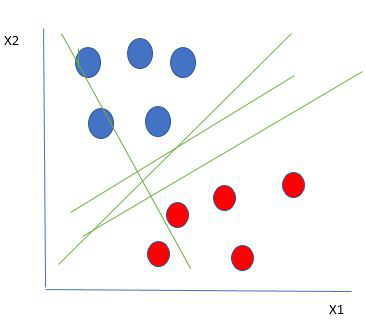

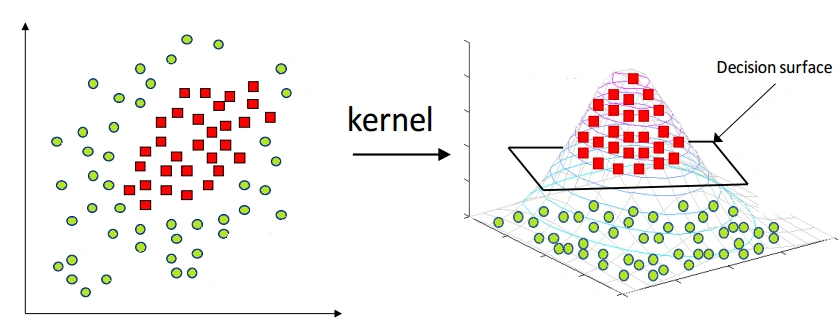

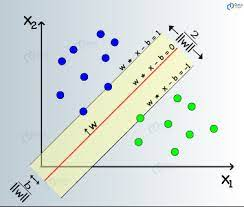

##### Step 5.3.1 : Importing Module

In [58]:
from sklearn.svm import SVC

model_svc = SVC()

model_svc.fit(X_train, y_train)

SVC()

##### Step 5.3.2 : Predict X_test 

In [59]:
y_pred = model_svc.predict(X_test)

##### Step 5.3.3 : Checking Scores and Confusion Matrix

In [60]:
print('Accuracy Score', accuracy_score(y_test, y_pred))
print('Precision Score', precision_score(y_test, y_pred))
print('Recall Score', recall_score(y_test, y_pred))
print('F1 Score', f1_score(y_test, y_pred))

Accuracy Score 0.7049180327868853
Precision Score 0.6666666666666666
Recall Score 0.875
F1 Score 0.7567567567567568


In [61]:
svc_score = accuracy_score(y_test, y_pred)

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.52      0.62        29
           1       0.67      0.88      0.76        32

    accuracy                           0.70        61
   macro avg       0.73      0.70      0.69        61
weighted avg       0.73      0.70      0.69        61



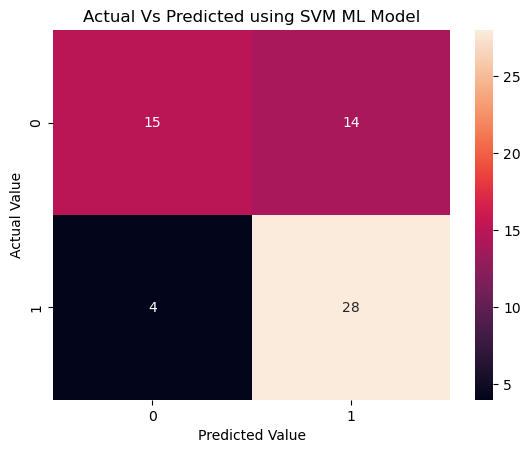

In [63]:
cm = confusion_matrix(y_test, y_pred)
plt.title('Actual Vs Predicted using SVM ML Model')
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [64]:
print(lr_score)
print(nv_score)
print(svc_score)

0.8852459016393442
0.8688524590163934
0.7049180327868853


In [65]:
model_svc.score(X_test,y_test)

0.7049180327868853

### Step 5.4 : Decision Tree ML Model  

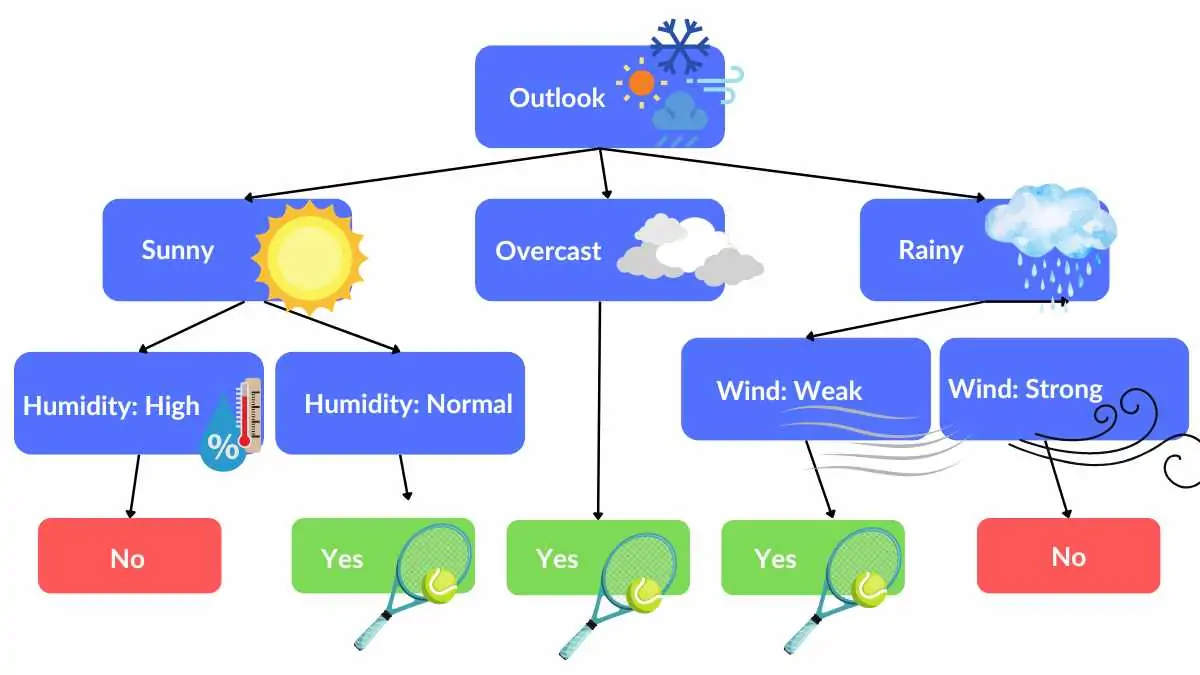

In [66]:
# what is root node and leaf node

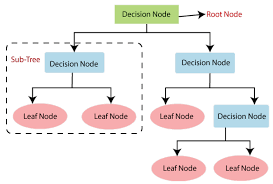

In [67]:
# iris flower : sepal length, sepal width, petal length, petal width
# three speices of iris flower : versicolor, setosa and virginica

In [68]:
# Decision node : petal width(cm) <= 0.8, gini(Gini impurity is low that feature will be choosen as decision node)

##### 5.4.1 Importing module

In [69]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()

model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

##### 5.4.2 : Predict X_test

In [70]:
y_pred = model_dt.predict(X_test)

##### 5.4.3 Checking Scores and Confusion Matrix 

In [71]:
print('Accuracy Score', accuracy_score(y_test, y_pred))
print('Precision Score', precision_score(y_test, y_pred))
print('Recall Score', recall_score(y_test, y_pred))
print('F1 Score', f1_score(y_test, y_pred))

Accuracy Score 0.819672131147541
Precision Score 0.8620689655172413
Recall Score 0.78125
F1 Score 0.819672131147541


In [72]:
dt_score = accuracy_score(y_test, y_pred)

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



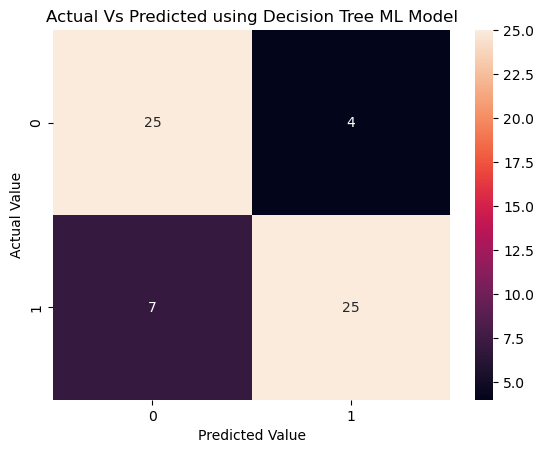

In [74]:
cm = confusion_matrix(y_test, y_pred)
plt.title('Actual Vs Predicted using Decision Tree ML Model')
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

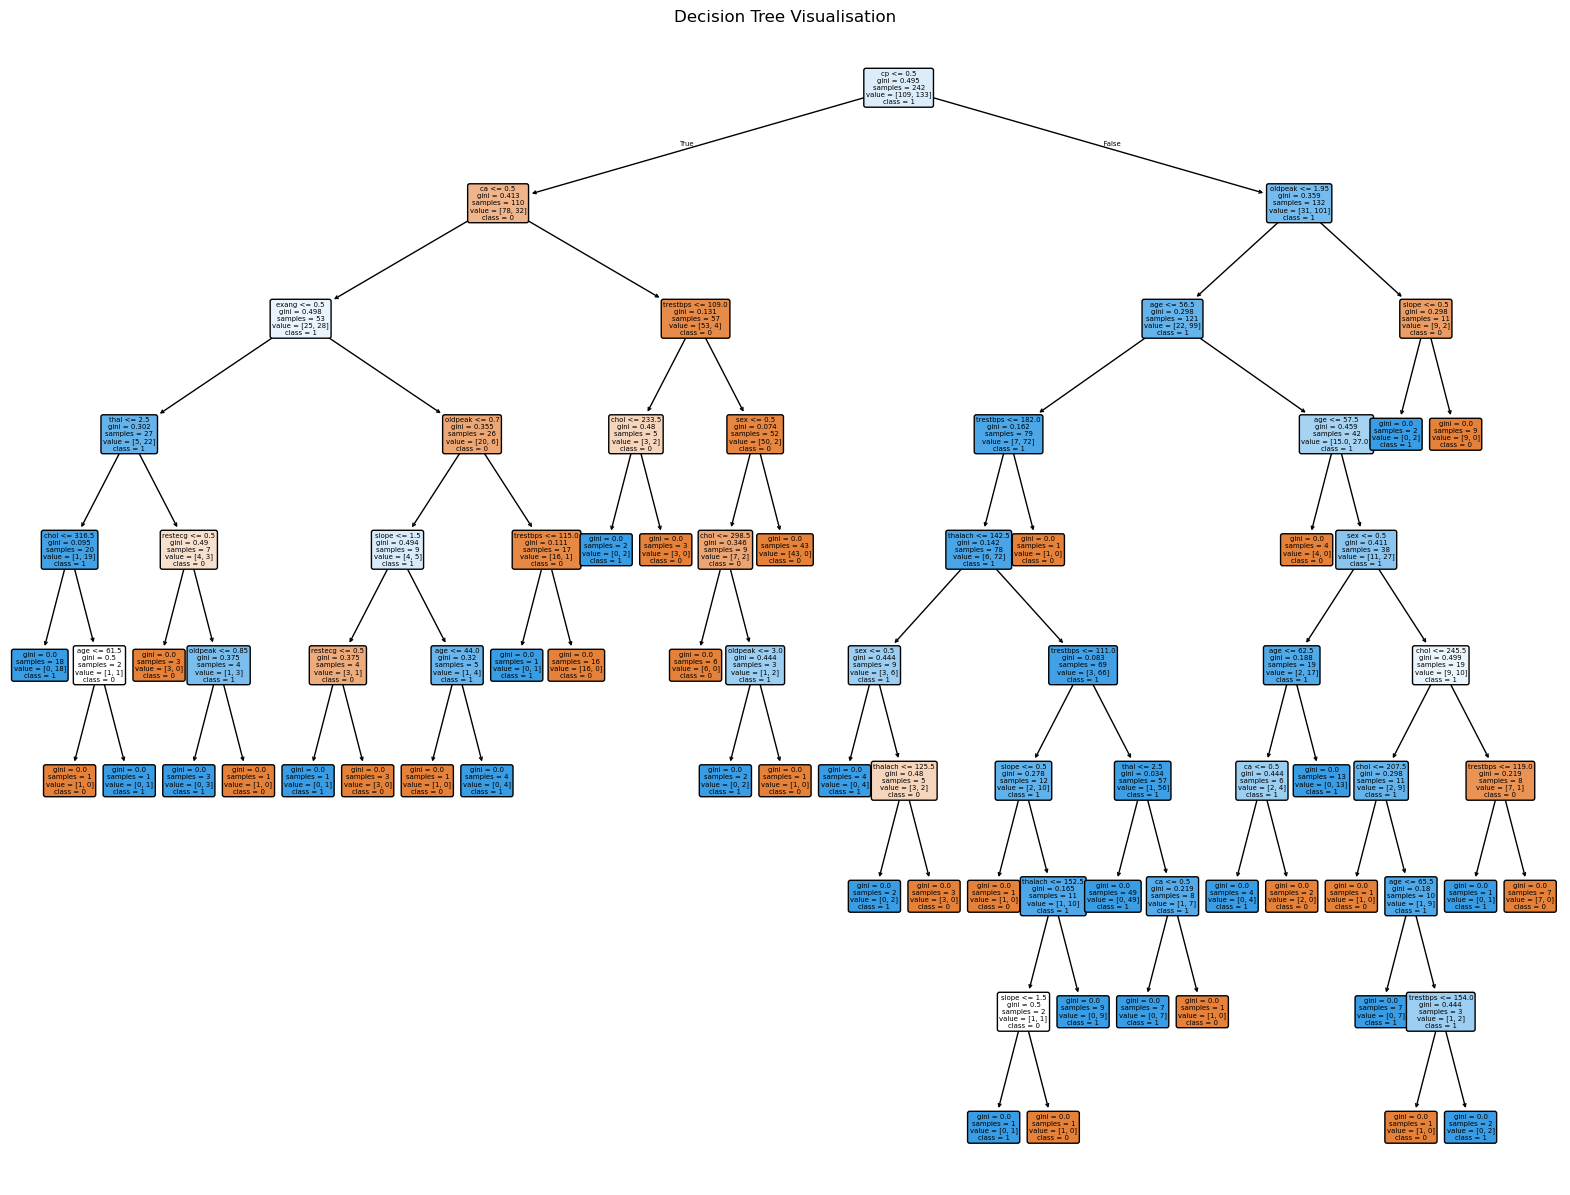

In [75]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(model_dt,
         feature_names = X.columns,
         class_names = ['0','1'],
         filled = True,
         rounded = True, 
         fontsize = 5)
plt.title('Decision Tree Visualisation')
plt.show()

In [76]:
print(lr_score)
print(nv_score)
print(svc_score)
print(dt_score)

0.8852459016393442
0.8688524590163934
0.7049180327868853
0.819672131147541


### Step 5.5 : Ensemble ML Model
- Bagging Technique : Bags of Multiple ML Model, and each model give its prediction/classification, final outcome based on majority
- Boosting Technique : Next Model learn from previous model and boost it minimize error to improve

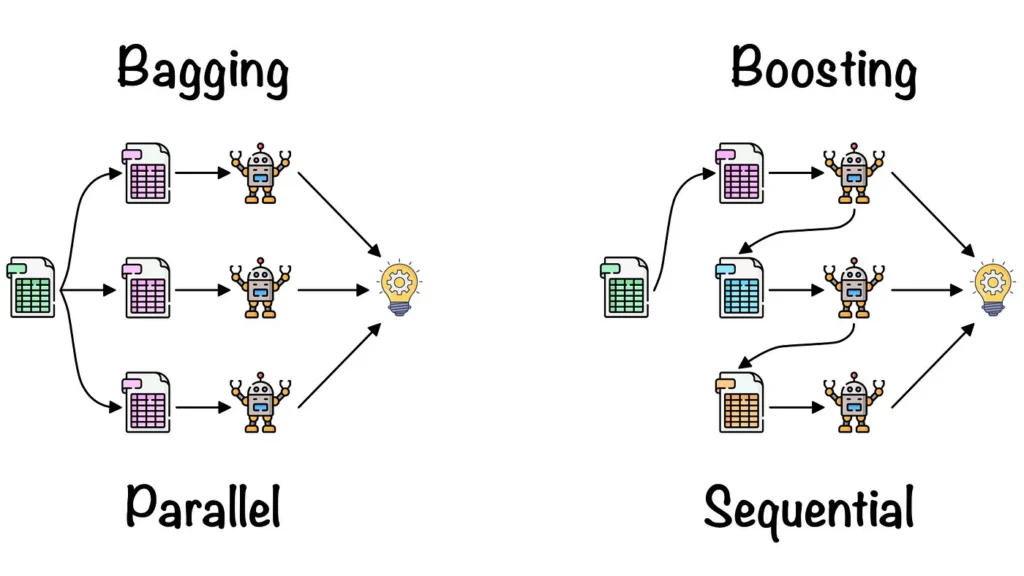

##### Step 5.5.1 : Bagging Technique Model >> Random Forest Machine Learning Model

##### Random Forest(Algo) :
- bags of multiple decision tree Models
- Default trees = 100
- Bagging Technique(Ensemble)

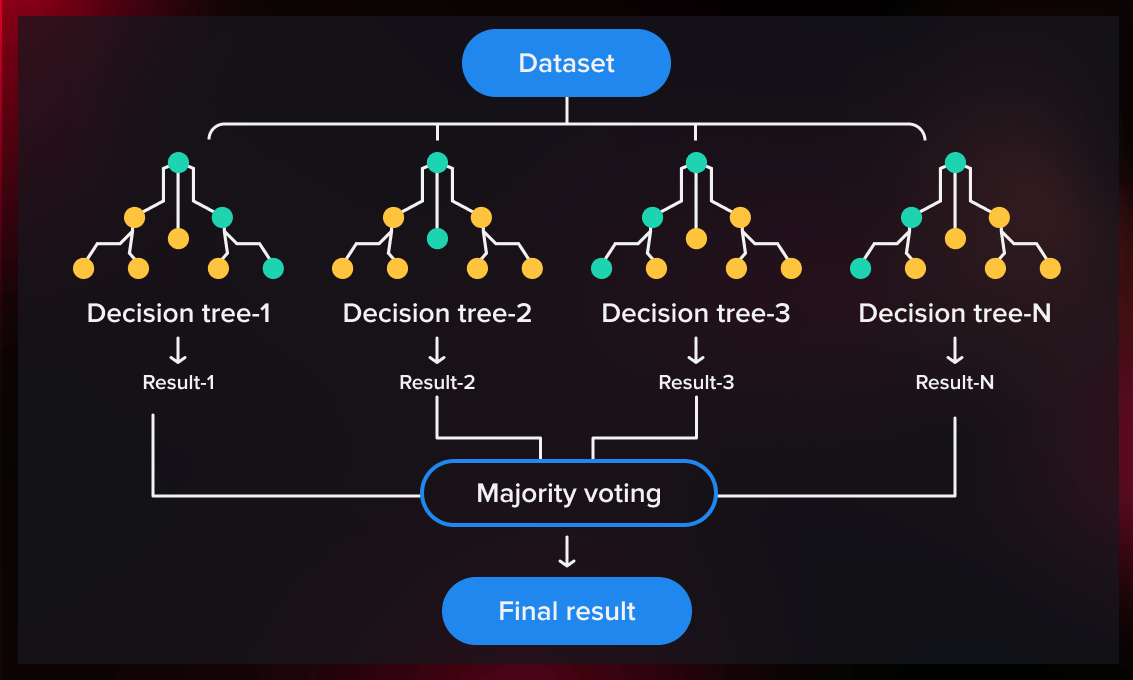

###### Random Forect Gression Problem : 
 - avg of Final value>> 2.2 + 2.4 + 2.5 >> 2.36
 - Random Forest Classification >> Binary/Multiclass classification >> Najority Voting

##### Step 5.5.2 : Import Random Forest Model

In [77]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators = 200) # parameter change default to 200

model_rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

##### Step 5.5.3 : Predict X_test 


In [78]:
y_pred = model_rf.predict(X_test)

##### step 5.5.4 Checking Scores and Confusion Matrix

In [79]:
print('Accuracy Score', accuracy_score(y_test, y_pred))
print('Precision Score', precision_score(y_test, y_pred))
print('Recall Score', recall_score(y_test, y_pred))
print('F1 Score', f1_score(y_test, y_pred))

Accuracy Score 0.819672131147541
Precision Score 0.8387096774193549
Recall Score 0.8125
F1 Score 0.8253968253968254


In [80]:
rf_score = accuracy_score(y_test, y_pred)

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



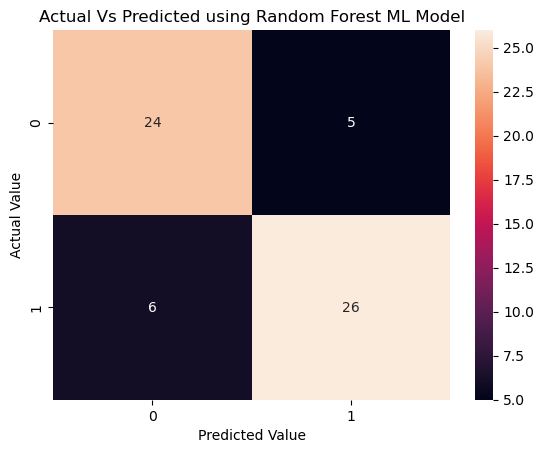

In [82]:
cm = confusion_matrix(y_test, y_pred)
plt.title('Actual Vs Predicted using Random Forest ML Model')
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

### Ensemble Boosting Technique : 
 - AdaBoost
 - Gradient Boosting
 - XGBoost 

In [83]:
# AdaBoost : Adaptive Boosting 
# GradientBoost : GBM
# LBM + GradientBoost : LGBM
# XGBoost : Extreme Gradient Boosting
# CatBoost : Categorical : Textual data

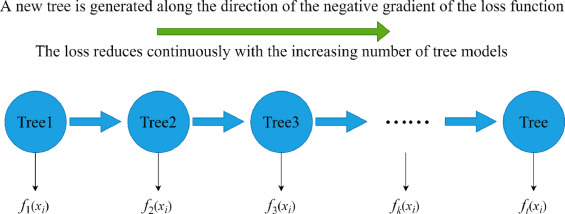

##### Step 5.6.1 Import XGBoost ML Algo

In [84]:
 pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [85]:
import xgboost
print('done')

done


In [86]:
from xgboost import XGBClassifier 
model_xgb = XGBClassifier() # hyperparameters : objectives : 'binary: logistics', random_state = 42, learning_rate = 0.001
model_xgb.fit(X_train,y_train) # NONE - hyperparameters : model fine tune

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [87]:
y_pred = model_xgb.predict(X_test)

In [88]:
xgb_score = accuracy_score(y_test,y_pred)
xgb_score

0.819672131147541

In [89]:
print('Accuracy Score', accuracy_score(y_test, y_pred))
print('Precision Score', precision_score(y_test, y_pred))
print('Recall Score', recall_score(y_test, y_pred))
print('F1 Score', f1_score(y_test, y_pred))

Accuracy Score 0.819672131147541
Precision Score 0.8620689655172413
Recall Score 0.78125
F1 Score 0.819672131147541


In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



### Step 5.7 KNN(K-Nearest Neighbors) : Regression and Classification 

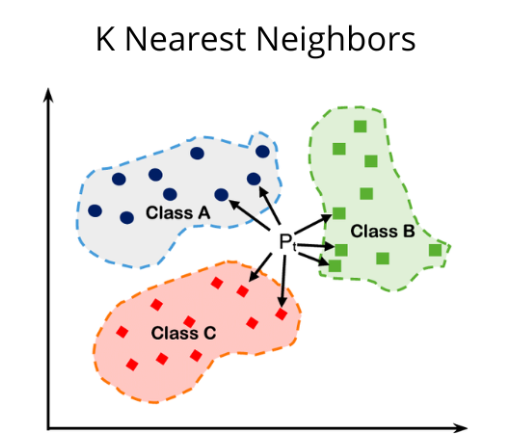

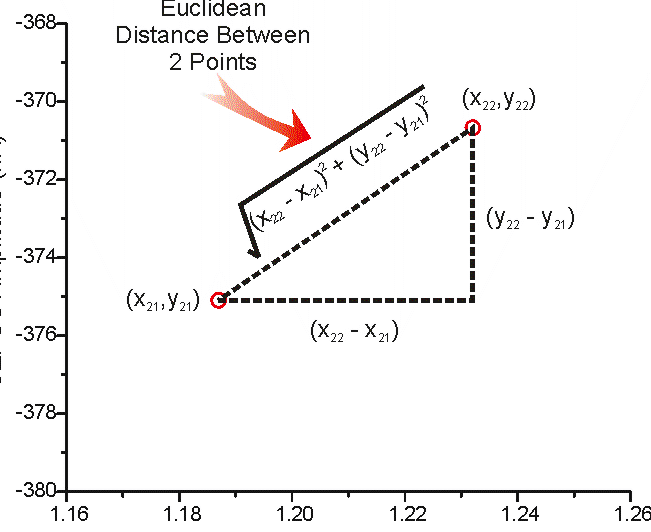

##### Step 5.7.1 Import KNN

In [91]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=14)
model_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=14)

##### Step 5.7.2 Predit X_test 

In [92]:
y_pred = model_knn.predict(X_test)

In [93]:
knn_score = accuracy_score(y_test,y_pred)
knn_score

0.7377049180327869

##### Step 5.7.3 Checking Scores and Confusion Matrix

In [94]:
print('Accuracy Score', accuracy_score(y_test, y_pred))
print('Precision Score', precision_score(y_test, y_pred))
print('Recall Score', recall_score(y_test, y_pred))
print('F1 Score', f1_score(y_test, y_pred))

Accuracy Score 0.7377049180327869
Precision Score 0.7666666666666667
Recall Score 0.71875
F1 Score 0.7419354838709677


In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73        29
           1       0.77      0.72      0.74        32

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



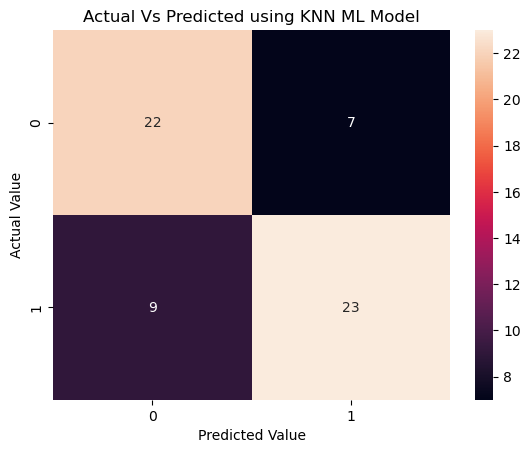

In [96]:
cm = confusion_matrix(y_test, y_pred)
plt.title('Actual Vs Predicted using KNN ML Model')
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

### Step 5.8 Artifical Neural Network using Deep Learning

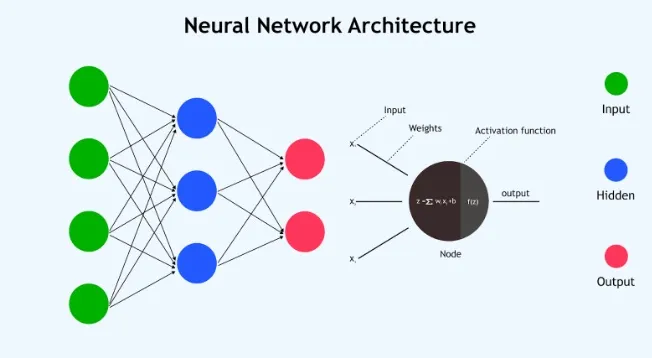

In [97]:
# ML works only on limited data 
# if input changes ML Model Fail (8 Features col: 8)

In [98]:
# Deep learning : Dense(Deep) Neural Network : Network : trained on  multiple possiblities 

In [99]:
# keras tensor flow: 
# tensors : arryas
# flow: bi and multi direction 

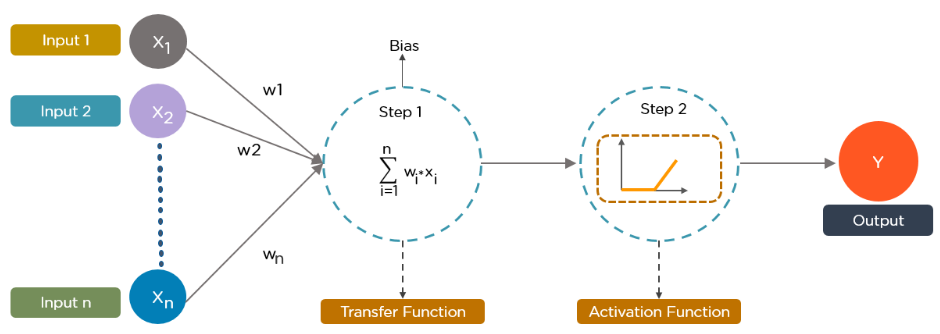

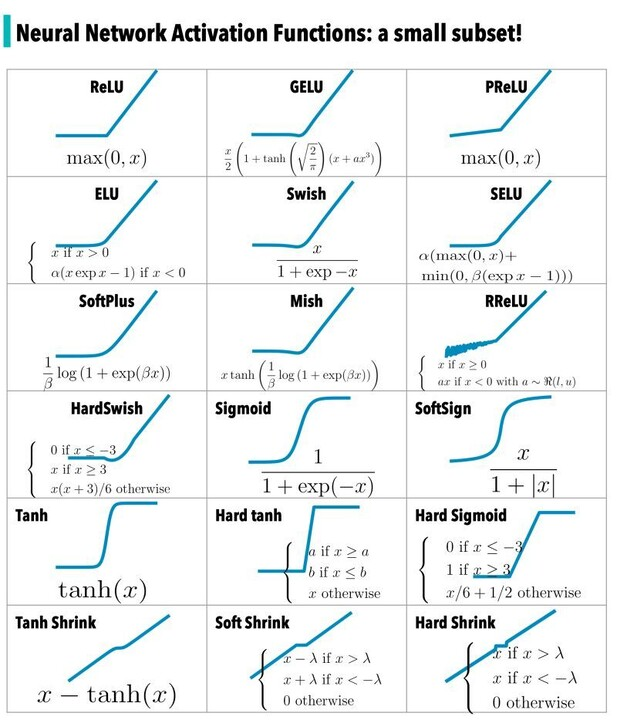

##### Step 5.8.1 ANN Model Creation 

In [100]:
# pip install keras

In [112]:
# pip install tensorflow

In [113]:
from keras.models import Sequential 
from keras.layers import Dense

In [114]:
model = Sequential()  # Step 1 Sequential model creation
model.add(Dense(11,activation='relu',input_dim=13)) # Dense Layer
model.add(Dense(1,activation='sigmoid')) # Output will be 1 Neuron for Binary

model.compile(loss='binary_crossentropy',  # loss to calculate model loss
              optimizer='adam', #optimizer to optimize model learning
              metrics=['accuracy'])  #  metrics return accuracy score

print('Done')

Done


##### Step 5.8.3 Model Training 

In [115]:
model.fit(X_train,y_train,epochs = 300) # iterartion during retraining : epochs = 300

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.4504 - loss: 23.7683
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4504 - loss: 13.9487 
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4380 - loss: 4.9553 
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5702 - loss: 3.5098 
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5785 - loss: 3.6286 
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5372 - loss: 2.3023 
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4793 - loss: 2.4957 
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5165 - loss: 2.1471 
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5826 - loss: 1.9459
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5785 - loss: 1.7781 
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5661 - loss: 1.7593
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0

##### Step 5.8.4 predict X_test

In [116]:
y_pred = model.predict(X_test)
y_pred = [round(i[0]) for i in y_pred]
print(y_pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
[0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]


In [118]:
ann_score = accuracy_score(y_test,y_pred)

### Step 6 : Comparsion of All Models

In [122]:
all_model_score = [lr_score, nv_score, svc_score, dt_score, rf_score,xgb_score, knn_score,ann_score]
model_name = ['logistic','Naive','SVM','Decision Tree','Random Forest','XGB','KNN','ANN']

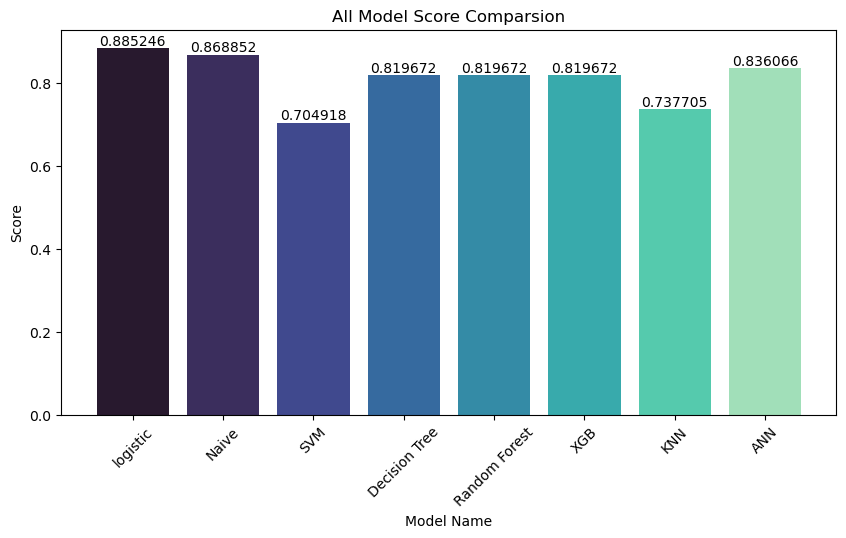

In [129]:
plt.figure(figsize=(10,5))
plt.title('All Model Score Comparsion')
ax = plt.bar(x = model_name,height = all_model_score, color = sns.color_palette('mako',8))
plt.bar_label(ax)
plt.xlabel('Model Name')
plt.ylabel('Score')
plt.xticks(rotation = 45)
plt.show()

### Step 7 : Best Model Save 

In [130]:
# lr has the highest score so the Final Model is logistics Regression 

In [133]:
import pickle
with open('heart_disease_pred.pkl','wb') as f:
    pickle.dump(model_lr,f)

print('done')

done


In [134]:
import os 
os.getcwd()

'C:\\Users\\Anjali\\Heart Disease Prediction'